# Search: Solving a maze

Total Points: 10


The agent has a map of the maze it is in (i.e., the environment is deterministic, discrete, and known). The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  

Here is the small example maze:

In [1]:
from pyTree.Tree import Tree as Tree
from tabulate import tabulate
import pandas as pd

%run maze_helper.py

maze_files = ["small_maze.txt", 
              "medium_maze.txt", 
              "large_maze.txt", 
              "empty_maze.txt", 
              "wall_maze.txt", 
              "open_maze.txt",
              "loops_maze.txt"]
    

def ReadMaze (maze_file):
    
    f = open(maze_file, "r")
    maze_str = f.read()
    
    return maze_str

maze = list()

for file in maze_files:
    maze.append(parse_maze(ReadMaze(file)))

__Notes:__ 
* This is a planing exercise, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent can just follow the path and does not need percepts. The execution phase is trivial and we do not implement it in this exercise.
* Tree search algorithm implementations that you find online have often a different aim. The algorithms assume that you already have a tree and the goal is to traverse all nodes. We are interested in dynamically creating a search tree with the aim of finding a good/the best path to the goal state. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible. 
* Some mazes may contain cycles and therefore not form proper trees unless cycles are prevented. 

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the file [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation.

In [2]:
#from pyTree.Tree import Tree as Tree
#from tabulate import tabulate

#%run maze_helper.py

#maze = parse_maze(ReadMaze(maze_files[0]))

# look at two positions in the maze
#print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)`
#print("Position(8,1):", look(maze, [8, 1]))

Visualize the maze

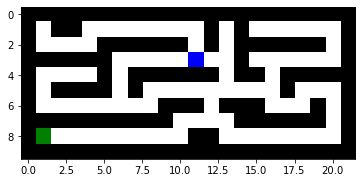

In [3]:
show_maze(maze[0])

Find the position of the start and the goal using the helper function `find_pos()`

In [4]:
print("Start location:", find_pos(maze[0], what = "S"))
print("Goal location:", find_pos(maze[0], what = "G"))

Start location: [3, 11]
Goal location: [8, 1]


## Tree structures

A basic tree implementation in Python is available at https://github.com/yoyzhou/pyTree (found by John Park).


# Tasks

Implement the following search algorithms for solving different mazes:

* Breadth-first search (BFS)
* Depth-first search (DFS)
* Iterative deepening search (IDS)
* Greedy best-first search (GBFS)
* A* search

Run each of the above algorithms on the 
[small maze](small_maze.txt), 
[medium maze](medium_maze.txt), 
[large maze](large_maze.txt), 
[open maze](open_maze.txt),
[empty maze](empty_maze.txt), 
[wall maze](wall_maze.txt), 
and the 
[loops maze](loops_maze.txt). 
For each problem instance and each search algorithm, report the following in a table:

* The solution and its path cost
* Number of nodes expanded
* Maximum tree depth searched
* Maximum size of the frontier.

Display each solution by marking every maze square (or state) visited and the squares on the final path.

## Task 1: Defining the search Problem [1 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

# Solution:
* Initial state: cell "S"
* Action: Move from one cell to a neighboring cell.
* Transition: If the program moves from cell X to cell Y, it will end up in cell Y.
* Goal state: cell "G"
* Path cost: the sum of steps from cell to another, each step has a cost of 1.

# Helper Functions:

In [5]:
def available_directions(maze, pos):
    
    pos_options = np.add(pos, [[-1,0], [0,1], [1,0], [0,-1]])
    np.random.shuffle(pos_options)
    return ([avail_pos.tolist() for avail_pos in pos_options if look(maze, avail_pos) != "X"])

available_directions(maze[0], find_pos(maze[0], "S"))

[[3, 12], [2, 11], [3, 10]]

In [6]:
def get_path(node):
    
    path = list()
    path.append(node.data)
    
    while not node.isRoot():
        node = node.getParent()
        path.append(node.data)
    path.reverse()
    return(path)

In [7]:
def show_path(maze, path, reached = []):
    
    maze_viz = np.copy(maze)
    
    for pos in path:
        if maze_viz[pos[0],pos[1]] == " ":
            maze_viz[pos[0],pos[1]] = "P"
    for pos in reached:
        if maze_viz[pos[0],pos[1]] == " ":
            maze_viz[pos[0],pos[1]] = "."
    
    show_maze(maze_viz)

In [8]:
def min_index(x):
    
    return(np.random.choice(np.where(x == np.amin(x))[0]))

# Heuristics:

In [9]:
def manhattan(pos1, pos2):
    return(np.sum(np.abs(np.subtract(pos1, pos2))))

In [10]:
def g(node):
    return(len(get_path(node))-1)

## Task 2: Breadth-first, Depth-first and iterative deepening search [4 points]

Implement these search strategies. You can implement a generic tree search following the BFS pseudo-code in your textbook and then just adapt the order in which the frontier is explored.

In [11]:
def MazeSolver(maze, search = "BFS", limit = 0, debug = False, visual = False):
    
    start = find_pos(maze, "S")
    goal = find_pos(maze, "G")
    
    if visual: maze_visual = np.copy(maze)
        
    root = Tree(data = start)
    
    frontier = [root]
    reached = dict()
    reached[tuple(root.data)] = root
    
    node = root
    
    maxFrontier = 0
    maxDepth = 0
    
    while not len(frontier) < 1:
        
        if debug: print("Frontier:", [n.data for n in frontier])
        
        if search == "BFS":
            node = frontier.pop(0)
        elif search == "DFS" or "IDS":
            node = frontier.pop(-1)
        elif search == "GBFS":
            h = [manhattan(n.data, goal) for n in frontier]
            node = frontier.pop(min_index(h))
        elif search == "A*":
            h = [g(n) + manhattan(n.data, goal) for n in frontier]
            node = frontier.pop(min_index(h))
        
        if look(maze, node.data) == "G":
            return({"path": get_path(node), "reached": reached.keys(), "max_frontier": maxFrontier, "max_depth": maxDepth})
        
        if search == "IDS":
            if g(node) > limit:
                continue
        
        if debug: print("Expanding: ", node.data)
        
        for pos in available_directions(maze, node.data):
            
            if not tuple(pos) in reached.keys():
                new_node = Tree(data = pos)
                node.addChild(new_node)
                frontier.append(new_node)
                reached[tuple(pos)] = new_node
                
                if visual: maze_visual[pos[0],pos[1]] = "."
        
        if maxFrontier < len(frontier): maxFrontier = len(frontier)
        if maxDepth < g(node) : maxDepth = g(node)
            
        if debug: print("Adding to frontier:", [n.data for n in node.getChildren()])
            
        if visual:
            show_maze(maze_visual)
                
    return(None) #Failed

# BFS

Maze: small_maze.txt
Path cost: 19
Explored squares: 93


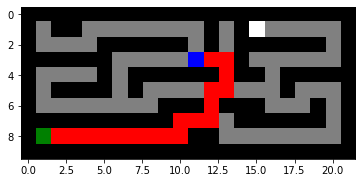

Maze: medium_maze.txt
Path cost: 68
Explored squares: 271


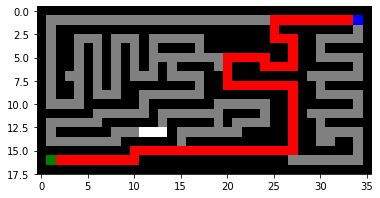

Maze: large_maze.txt
Path cost: 210
Explored squares: 624


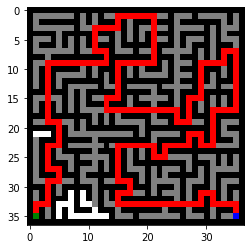

Maze: empty_maze.txt
Path cost: 14
Explored squares: 98


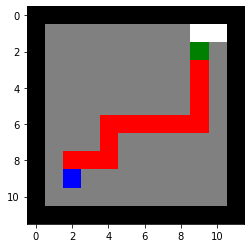

Maze: wall_maze.txt
Path cost: 14
Explored squares: 91


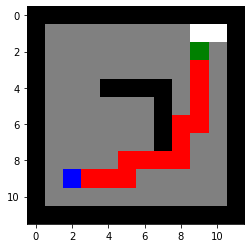

Maze: open_maze.txt
Path cost: 54
Explored squares: 684


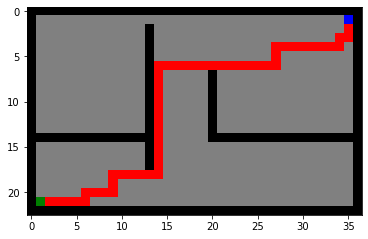

Maze: loops_maze.txt
Path cost: 23
Explored squares: 72


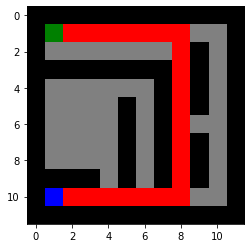

In [12]:
table_content = dict()

mazeNum = 0
for m in maze:
    solution = MazeSolver(m, "BFS")
    
    print("Maze:", maze_files[mazeNum])
    print("Path cost:", len(solution["path"])-1)
    print("Explored squares:", len(solution["reached"]))
    
    table_content[maze_files[mazeNum]] = [["BFS", len(solution["path"])-1, len(solution["reached"]), solution["max_frontier"], solution["max_depth"]]]
    mazeNum = mazeNum+1
    
    show_path(m, solution["path"], solution["reached"])
    

## Answer
* Complete: YES. It will find the node at a certain depth after expanding the nodes shallower than the goal node.
* Optimal: YES. It stops at the shallowest goal found.
* Time: O(b^d), where 'b' is the number of childs a node is allowed to have and 'd' is the depth of the tree.
* Space: O(b^d)

# DFS

Maze: small_maze.txt
Path cost: 29
Explored squares: 48


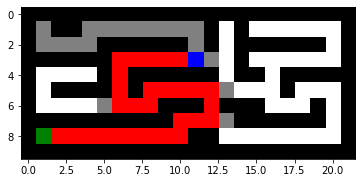

Maze: medium_maze.txt
Path cost: 74
Explored squares: 82


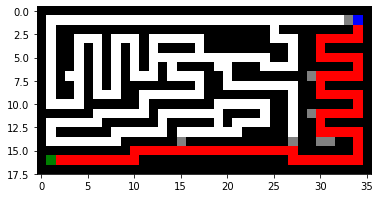

Maze: large_maze.txt
Path cost: 210
Explored squares: 515


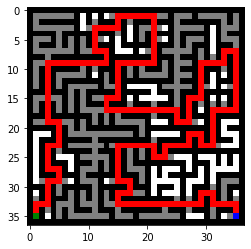

Maze: empty_maze.txt
Path cost: 16
Explored squares: 100


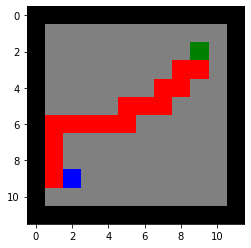

Maze: wall_maze.txt
Path cost: 22
Explored squares: 46


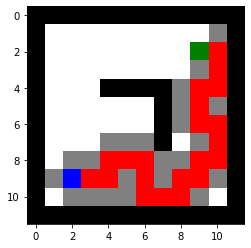

Maze: open_maze.txt
Path cost: 114
Explored squares: 390


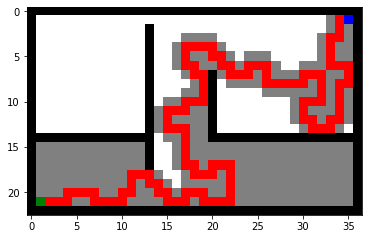

Maze: loops_maze.txt
Path cost: 25
Explored squares: 62


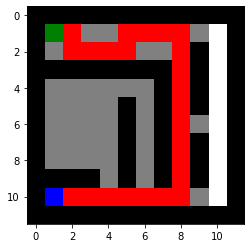

In [13]:
mazeNum = 0
for m in maze:
    solution = MazeSolver(m, "DFS")
    
    print("Maze:", maze_files[mazeNum])
    print("Path cost:", len(solution["path"])-1)
    print("Explored squares:", len(solution["reached"]))
    
    table_content[maze_files[mazeNum]].append(["DFS", len(solution["path"])-1, len(solution["reached"]), solution["max_frontier"], solution["max_depth"]])
    mazeNum = mazeNum+1

    show_path(m, solution["path"], solution["reached"])

Are your implementations complete and optimal? Explain why. What is the time and space complexity of each?

## Answer
* Complete: NO. it can be complete in finit spaces, but fails if loops exist
* Optimal: NO. It is not guaranteed to produce the same path result.
* Time: O(b^m), Where 'm' is the maximum length of the tree.
* Space: O(bm)

# IDS

Maze: small_maze.txt
Path cost: 19
Explored squares: 73


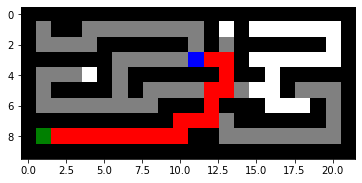

Maze: medium_maze.txt
Path cost: 68
Explored squares: 135


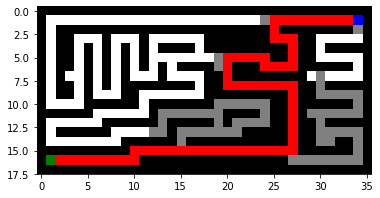

Maze: large_maze.txt
Path cost: 210
Explored squares: 539


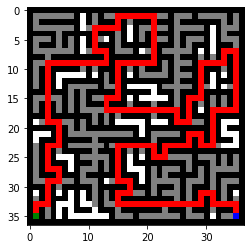

Maze: empty_maze.txt
Path cost: 14
Explored squares: 61


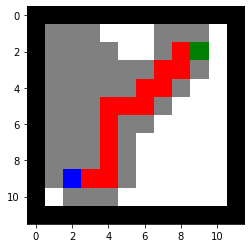

Maze: wall_maze.txt
Path cost: 18
Explored squares: 63


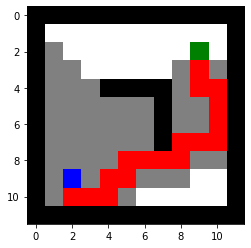

Maze: open_maze.txt
Path cost: 68
Explored squares: 291


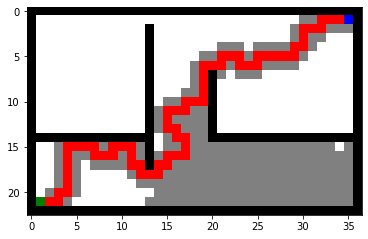

Maze: loops_maze.txt
Path cost: 25
Explored squares: 72


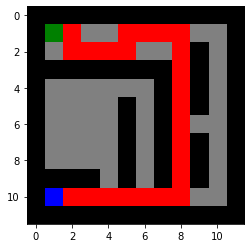

In [14]:
mazeNum = 0
for m in maze:
    for limit in range (1000):
        solution = MazeSolver(m, search = "IDS", limit = limit)
        if not solution == None:
            break
    
    print("Maze:", maze_files[mazeNum])
    print("Path cost:", len(solution["path"])-1)
    print("Explored squares:", len(solution["reached"]))
    
    table_content[maze_files[mazeNum]].append(["IDS", len(solution["path"])-1, len(solution["reached"]), solution["max_frontier"], solution["max_depth"]])
    mazeNum = mazeNum+1

    show_path(m, solution["path"], solution["reached"])

# Answer

IDS is the one algorithm that I am not confident of my implementation for it. The answers bellow are what is expected from IDS, but I add details about my observations. 

* Complete: YES. 
    * It found the goal cell in all mazes.
* Optimal: YES. 
    * However, in my implementation it failed to return the shortest/same path in multiple mazes.
* Time: O(b^d). 
    * Same as BFS in theory, but it was by far the longest to run! Is my implementation is failing some corner case? I used different limits, the smaller the number the faster it ran. I didn't see a correlation between increasing the limit and a better solution. I tried smaller limits that above, but they made the program fail.
* Space: O(b^d)

## Task 3: Greedy best-first search [2 points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function.

Maze: small_maze.txt
Path cost: 37
Explored squares: 57


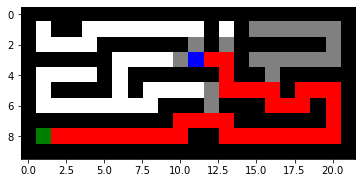

Maze: medium_maze.txt
Path cost: 130
Explored squares: 261


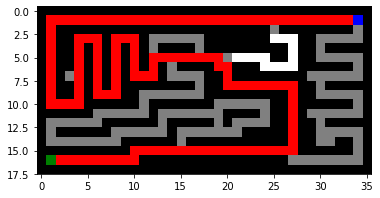

Maze: large_maze.txt
Path cost: 210
Explored squares: 410


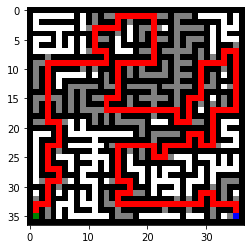

Maze: empty_maze.txt
Path cost: 42
Explored squares: 92


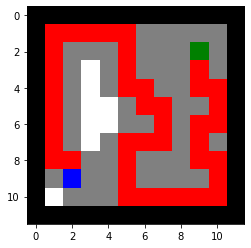

Maze: wall_maze.txt
Path cost: 26
Explored squares: 49


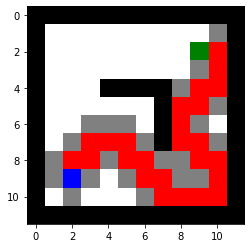

Maze: open_maze.txt
Path cost: 108
Explored squares: 451


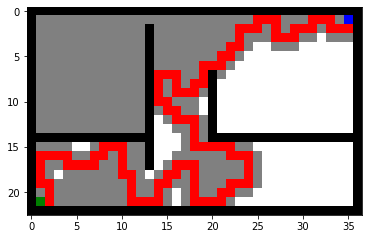

Maze: loops_maze.txt
Path cost: 29
Explored squares: 67


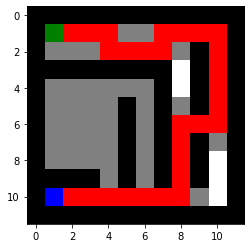

In [15]:
mazeNum = 0
for m in maze:
    solution = MazeSolver(m, "GBFS")
    
    print("Maze:", maze_files[mazeNum])
    print("Path cost:", len(solution["path"])-1)
    print("Explored squares:", len(solution["reached"]))
    
    table_content[maze_files[mazeNum]].append(["GBFS", len(solution["path"])-1, len(solution["reached"]), solution["max_frontier"], solution["max_depth"]])
    mazeNum = mazeNum+1
    
    show_path(m, solution["path"], solution["reached"])

Is this implementation complete and optimal? What is the time and space complexity?

## Answer
* Complete: No. It can get stuck in loops.
* Optimal: NO. It is not guaranteed to produce the lowest cost path.
* Time: O(b^m), Where 'm' is the maximum length of the tree.
* Space: O(b^m)

## Task 4: A* Search [3 points]

Use again the Manhattan heuristic function.

Maze: small_maze.txt
Path cost: 49
Explored squares: 56


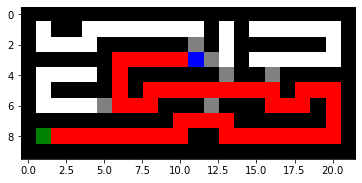

Maze: medium_maze.txt
Path cost: 74
Explored squares: 82


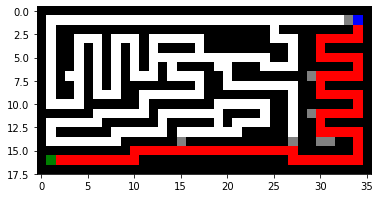

Maze: large_maze.txt
Path cost: 210
Explored squares: 503


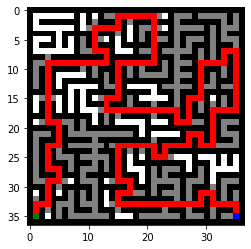

Maze: empty_maze.txt
Path cost: 20
Explored squares: 43


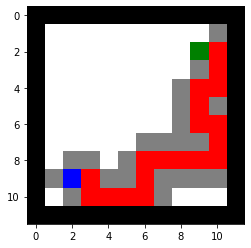

Maze: wall_maze.txt
Path cost: 20
Explored squares: 44


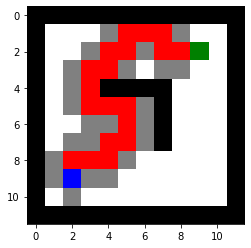

Maze: open_maze.txt
Path cost: 154
Explored squares: 376


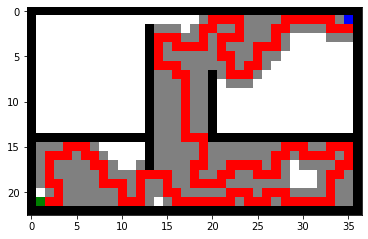

Maze: loops_maze.txt
Path cost: 31
Explored squares: 71


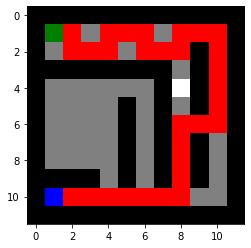

In [16]:
mazeNum = 0
for m in maze:
    solution = MazeSolver(m, "A*")
    
    print("Maze:", maze_files[mazeNum])
    print("Path cost:", len(solution["path"])-1)
    print("Explored squares:", len(solution["reached"]))
    
    table_content[maze_files[mazeNum]].append(["A*", len(solution["path"])-1, len(solution["reached"]), solution["max_frontier"], solution["max_depth"]])
    mazeNum = mazeNum+1
    
    show_path(m, solution["path"], solution["reached"])

Is this implementation complete and optimal? What is the time and space complexity?

## Answer
* Complete: YES. 
* Optimal: YES. If provided with a correct and consistent heuristic.
* Time: Exponential
* Space: Exponential

Don't forget to add a table that compares the following for the algorithms on the different mazes:

* The solution and its path cost
* Number of nodes expanded
* Maximum tree depth searched
* Maximum size of the frontier.

# Tables:

In [17]:
headers = ["Solution","Path Cost","Nodes Expanded", "Max Frontier size", "Max node depth"]

for maze in maze_files:
    print("Maze:", maze)
    print(tabulate(table_content[maze], headers = headers) + "\n")
    
#print(pd.DataFrame(table_content["small_maze.txt"]))

Maze: small_maze.txt
Solution      Path Cost    Nodes Expanded    Max Frontier size    Max node depth
----------  -----------  ----------------  -------------------  ----------------
BFS                  19                93                    8                18
DFS                  29                48                    5                28
IDS                  19                73                    6                20
GBFS                 37                57                    7                36
A*                   49                56                    7                48

Maze: medium_maze.txt
Solution      Path Cost    Nodes Expanded    Max Frontier size    Max node depth
----------  -----------  ----------------  -------------------  ----------------
BFS                  68               271                    8                67
DFS                  74                82                    5                73
IDS                  68               135                    9   

## Bonus Tasks [+1 point]

Instead of defining each square as a state (which you probably did), use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length in number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [18]:
# Your code/answer goes here

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [19]:
# Your code/answer goes here

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [20]:
# Your code/answer goes here